<a href="https://colab.research.google.com/github/Check-Your-Skin/checkyourskin-ml_model/blob/data-understanding/ISIC_SIIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
import datetime, os
import seaborn as sns
import matplotlib.pyplot as plt


# Mount Drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding


In [3]:
file_path = '/content/drive/My Drive/isic-siim/train.csv'
df = pd.read_csv(file_path)
df

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


# Verteilung der Klassen

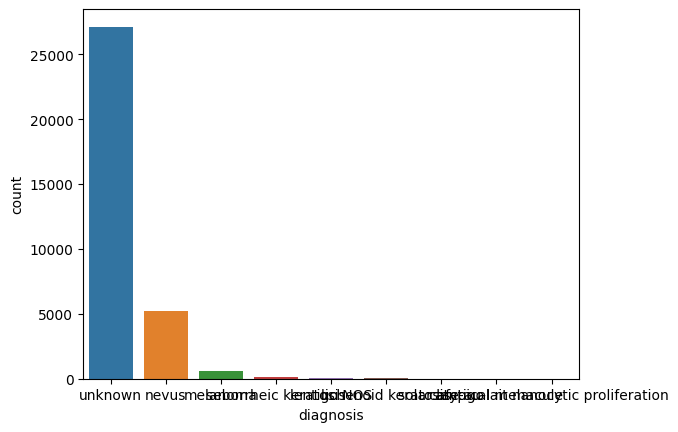

In [4]:
res = sns.countplot(x=df['diagnosis'])
plt.show()

In [5]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [6]:
df['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

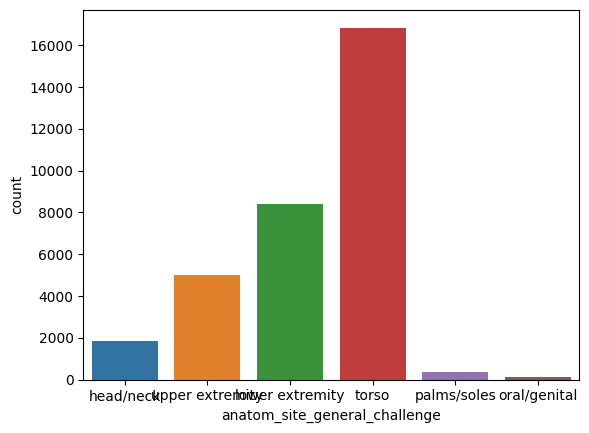

In [7]:
res = sns.countplot(x=df['anatom_site_general_challenge'])
plt.show()

In [8]:
df['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

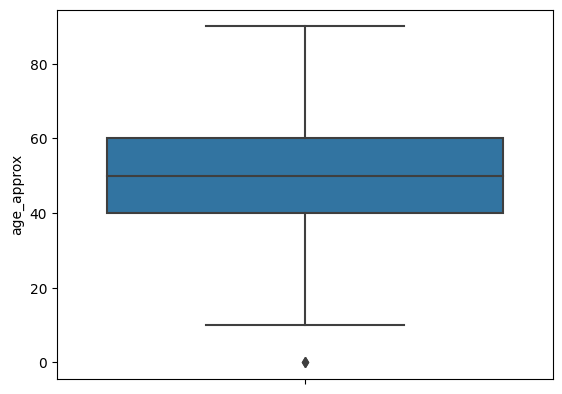

In [9]:
res = sns.boxplot(y=df['age_approx'])
plt.show()

In [10]:
print("Min: ", df['age_approx'].min())
print("Max: ", df['age_approx'].max())

q1 = df['age_approx'].quantile(0.25)
q3 = df['age_approx'].quantile(0.75)

iqa = q3 - q1 #interquartilsabstand
outliers = df[(df['age_approx']< q1-1.5*iqa) | (df['age_approx']> q3+1.5*iqa)]
print("Ausreißer: ", len(outliers))

Min:  0.0
Max:  90.0
Ausreißer:  2


#Erkenung von Outliers

In [11]:
missing_values_age = df['age_approx'].isna()
count_missing_age = 0

for value in missing_values_age:
    if value:
        count_missing_age += 1

In [12]:
missing_values_location = df['anatom_site_general_challenge'].isna()
count_missing_location = 0

for value in missing_values_location:
    if value:
        count_missing_location += 1

In [13]:
missing_values_sex = df['sex'].isna()
count_missing_sex = 0

for value in missing_values_sex:
    if value:
        count_missing_sex += 1

In [14]:
print("Anzahl fehlender Werte in 'Age'     : ", count_missing_age)
print("Anzahl fehlender Werte in 'Location': ", count_missing_location)
print("Anzahl fehlender Werte in 'Sex'     : ", count_missing_sex)

Anzahl fehlender Werte in 'Age'     :  68
Anzahl fehlender Werte in 'Location':  527
Anzahl fehlender Werte in 'Sex'     :  65


# Korrelation & One Hote Encoded Data


In [15]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['diagnosis', 'anatom_site_general_challenge'])

correlation_matrix = one_hot_encoded_data.corr(method='pearson')

<ipython-input-15-31015236d0c4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = one_hot_encoded_data.corr(method='pearson')


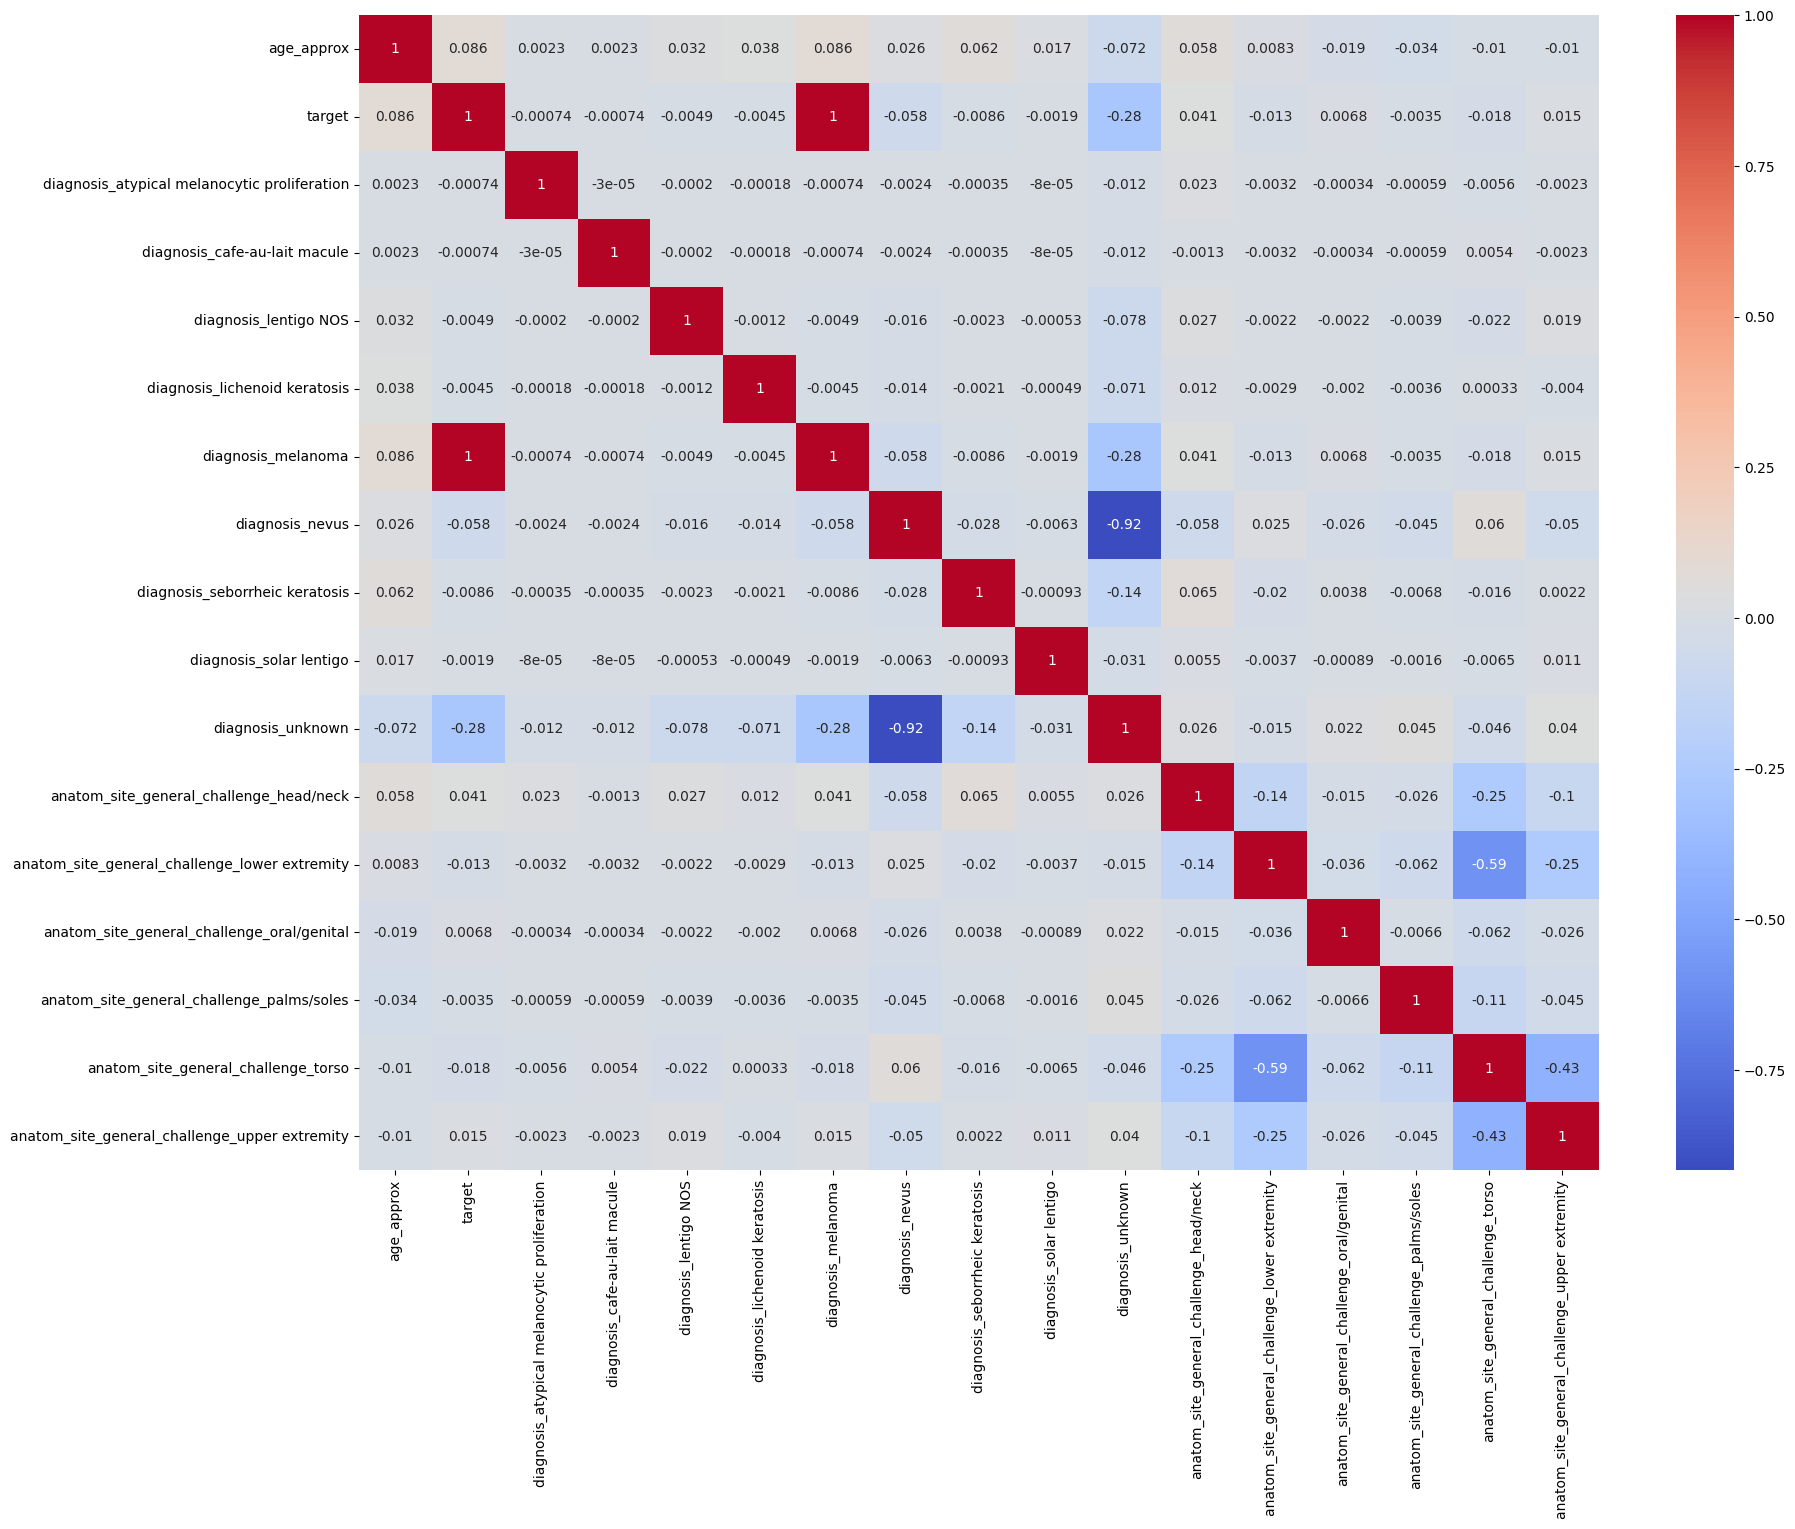

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()